***WORK IN PROGRESS !***

*VIEW [THIS NOTEBOOK ON NBVIEWER](https://nbviewer.org/github/scheinmensch/Spotify/blob/main/TheStreets.ipynb?flush_cache=False) TO SEE AND TRY INTERACTIVE ELEMENTS*

_________________________________

## An experimental data analysis about music of the band:
# <span style="font-family:'True Crimes';">THE STREETS</span>

<span style="font-family:'True Crimes';">The Streets</span> is an English musical project led by vocalist and multi-instrumentalist Mike Skinner. 

The Streets is considered one of the most important and influential acts within the trajectory of hip-hop, garage and grime music within the UK.

*source: [Wikipedia](https://en.wikipedia.org/wiki/The_Streets)*

**[Listen to The Streets while you read through this notebook](https://open.spotify.com/intl-de/track/1Uuljx1HOfRmi3dvHJ6Yi6)**

In [1]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator
from matplotlib import font_manager
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import warnings
from wordcloud import WordCloud
from matplotlib.colors import to_rgba

In [2]:
# get the fonts True Crimes and Anton
font_path = '/Users/johannakruger/Library/Fonts/crimes.ttf'
prop = font_manager.FontProperties(fname=font_path)

font_path2 = '/Users/johannakruger/Library/Fonts/Anton-Regular.ttf'
prop2 = font_manager.FontProperties(fname=font_path2)

In [3]:
# more settings
sns.set()

cpal= ["#c6b841","#ab4189","#4277c7","#AB4141", "#c67541","#92c641","#9e6565"]

cpal_px= {'The Darker The Shadow The Brighter The Light': '#c6b841', 
          'None Of Us Are Getting Out Of This Life Alive': '#ab4189', 
          'Computers and Blues': '#4277c7', 
          'Everything Is Borrowed': '#AB4141', 
          'The Hardest Way to Make an Easy Living': '#c67541', 
          "A Grand Don't Come for Free" : '#92c641', 
          "Original Pirate Material" : '#9e6565'}

pio.renderers.default = "jupyterlab+notebook_connected+svg"

In [4]:
# read df
ts = pd.read_csv('data/TheStreets.csv')

In [5]:
# reorder and select columns
ts = ts[['id', 'name', 'album_name', 'album_release_date', 'duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'tempo', 'time_signature', 'valence', 'explicit']].copy()

In [6]:
# show columns
ts.columns

Index(['id', 'name', 'album_name', 'album_release_date', 'duration_ms',
       'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo',
       'time_signature', 'valence', 'explicit'],
      dtype='object')

In [7]:
# have a look at the dataframe's first 5 rows
ts.head(5)

,id,name,album_name,album_release_date,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,valence,explicit
0,2BhQL5O24XJWjIjR9LRMxZ,Too Much Yayo,The Darker The Shadow The Brighter The Light,2023-10-13,221143,38,0.649,0.526,8,-6.933,1,0.3150,0.5360,0.0,0.0965,139.566,4,0.3550,False
1,37OMb2IjwLPJT7iDpYpowk,Money Isn’t Everything (feat. Teef),The Darker The Shadow The Brighter The Light,2023-10-13,176000,37,0.825,0.552,5,-6.820,0,0.0892,0.0697,0.0,0.1810,119.994,4,0.5090,True
2,7DshwYInfWfxHpZZOxFIjj,Walk of Shame,The Darker The Shadow The Brighter The Light,2023-10-13,176571,35,0.500,0.536,2,-7.119,1,0.2920,0.2000,0.0,0.1720,136.147,4,0.2360,True
3,0HEqIGeJleguoiStN2EHSS,Something to Hide,The Darker The Shadow The Brighter The Light,2023-10-13,193846,34,0.875,0.515,9,-7.789,1,0.3020,0.1170,0.0,0.0761,130.075,4,0.3270,True
4,14Fk6QB4PfXUPrYhPukMCb,Shake Hands With Shadows,The Darker The Shadow The Brighter The Light,2023-10-13,206263,33,0.681,0.683,2,-8.479,1,0.3350,0.0694,0.0,0.1150,134.021,4,0.0874,False


### What do all these audio features mean?

Let's have a look at the [Spotify Web API documentation](https://developer.spotify.com/documentation/web-api/reference/get-audio-features)

**popularity**
The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.

**duration_ms**
The duration of the track in milliseconds.

**acousticness**
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**danceability**
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy**
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**instrumentalness**
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**key**
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

**liveness**
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**loudness**
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**mode**
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**speechiness**
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**tempo**
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**time_signature**
An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

**valence**
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**explicit**
Whether or not the track has explicit lyrics ( true = yes it does; false = no it does not OR unknown).

In [8]:
# shape
ts.shape

(174, 19)

There are 174 tracks and 19 features.

In [9]:
# have a look at dtypes, number of non-null values per column
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  174 non-null    object 
 1   name                174 non-null    object 
 2   album_name          174 non-null    object 
 3   album_release_date  174 non-null    object 
 4   duration_ms         174 non-null    int64  
 5   popularity          174 non-null    int64  
 6   danceability        174 non-null    float64
 7   energy              174 non-null    float64
 8   key                 174 non-null    int64  
 9   loudness            174 non-null    float64
 10  mode                174 non-null    int64  
 11  speechiness         174 non-null    float64
 12  acousticness        174 non-null    float64
 13  instrumentalness    174 non-null    float64
 14  liveness            174 non-null    float64
 15  tempo               174 non-null    float64
 16  time_sig

There are no missing values. We have data of various types, most are discrete or continuous numbers.

I've noticed that the album_release_date for some albums aren't right

In [10]:
ts.loc[ts['album_name'] == "A Grand Don't Come for Free", 'album_release_date'] = '2004-05-17'
ts.loc[ts['album_name'] == 'Everything Is Borrowed', 'album_release_date'] = '2008-09-15'
ts.loc[ts['album_name'] == 'Computers and Blues', 'album_release_date'] = '2011-02-07'

How many tracks are on each album?

I keep the studio albums only, so no live albums and remixes are kept:

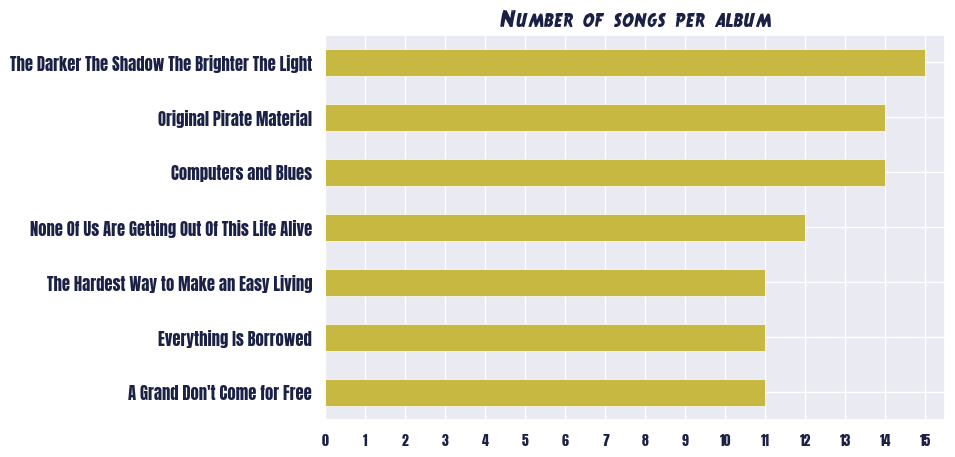

In [11]:
ts = ts[ts['album_name'].isin(['The Darker The Shadow The Brighter The Light','None Of Us Are Getting Out Of This Life Alive', 'Computers and Blues', 'Everything Is Borrowed', 'The Hardest Way to Make an Easy Living', "A Grand Don't Come for Free", 'Original Pirate Material'])].copy()
ts = ts[~ts['id'].isin(['1Wzx3Snr31fjeYGcZldPOk', '5Azg320BcSwTSi5Cs4geMf'])].copy()
unique_songs_per_album = ts.groupby('album_name')['id'].nunique().sort_values(ascending=True)
plt.figure(figsize=(8,5))
unique_songs_per_album.plot(kind='barh', color='#C6B841', edgecolor='#FFFFFF', linewidth=0.5)
plt.xlabel('', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.ylabel('', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.title('Number of songs per album', fontproperties=prop, fontsize=17, color='#1B2145')
plt.xticks(np.arange(0,26,1),fontproperties=prop2, fontsize=10, color='#1B2145')
plt.xlim(0,15.5)
plt.yticks(fontproperties=prop2, fontsize=12, color='#1B2145')
plt.show()

Let's check the most and least popular songs of The Streets on Spotify:

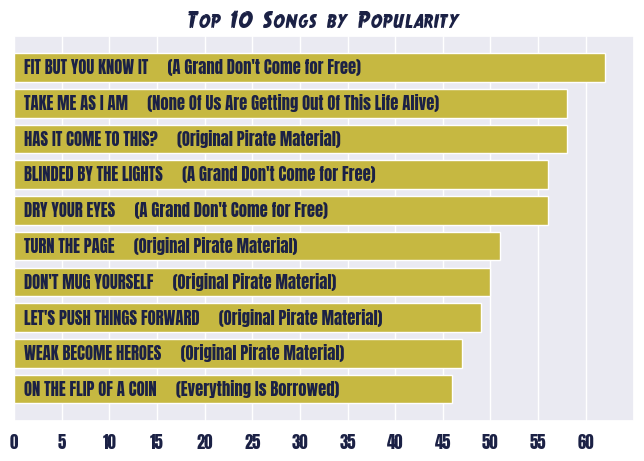

In [12]:
top_10_songs = ts.nlargest(10, 'popularity')[['name', 'album_name', 'popularity']].reset_index(drop=True)
top_10_songs['name'] = top_10_songs['name'].str.upper()
plt.figure(figsize=(8,5))
bars = plt.barh(range(len(top_10_songs)), top_10_songs['popularity'], color='#C6B841')

for i, bar in enumerate(bars):
    plt.text(1, bar.get_y() + bar.get_height()/2, 
             top_10_songs['name'].iloc[i] + '     (' + top_10_songs['album_name'].iloc[i] + ')', 
             va='center', ha='left', color='#1B2145', fontproperties=prop2, fontsize=12)

plt.xlabel('', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.ylabel('', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.title('Top 10 Songs by Popularity', fontproperties=prop, fontsize=17, color='#1B2145')
plt.yticks([])
plt.xticks(np.arange(0,65,5),fontproperties=prop2, fontsize=12, color='#1B2145')
plt.gca().invert_yaxis()  
plt.show()

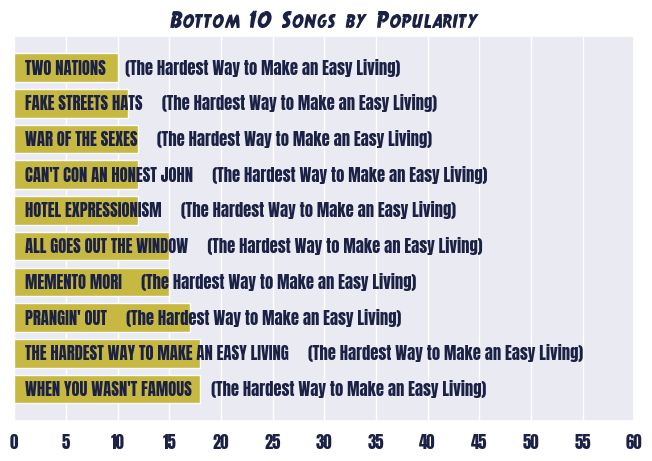

In [13]:
bottom_10_songs = ts.nsmallest(10, 'popularity')[['name', 'album_name', 'popularity']].reset_index(drop=True)
bottom_10_songs['name'] = bottom_10_songs['name'].str.upper()
plt.figure(figsize=(8,5))
bars = plt.barh(range(len(bottom_10_songs)), bottom_10_songs['popularity'], color='#C6B841')

for i, bar in enumerate(bars):
    plt.text(1, bar.get_y() + bar.get_height()/2, 
             bottom_10_songs['name'].iloc[i] + '     (' + bottom_10_songs['album_name'].iloc[i] + ')', 
             va='center', ha='left', color='#1B2145', fontproperties=prop2, fontsize=12)

plt.xlabel('', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.ylabel('', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.title('Bottom 10 Songs by Popularity', fontproperties=prop, fontsize=17, color='#1B2145')
plt.yticks([])
plt.xticks(np.arange(0,65,5),fontproperties=prop2, fontsize=12, color='#1B2145')
plt.gca().invert_yaxis()  
plt.show()

The majority of the most popular songs stem from the first two albums. "The Hardest Way to Make an Easy Living" is very unpopular.

Let's have a look at the 

### Popularity of each album

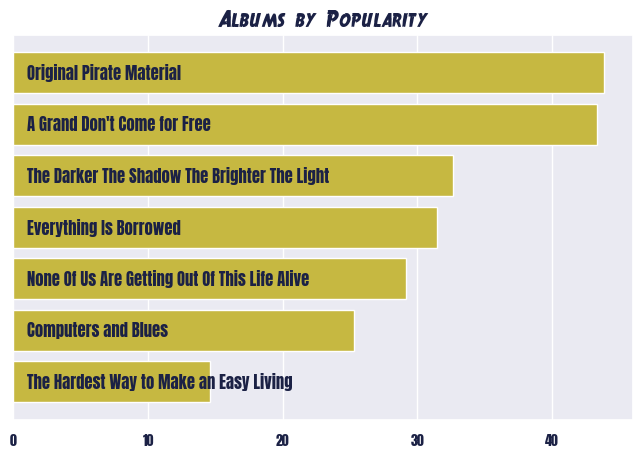

In [14]:
album_popularity = ts.groupby('album_name')['popularity'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8,5))
bars = plt.barh(range(len(album_popularity)), album_popularity['popularity'], color='#C6B841')

for i, bar in enumerate(bars):
    plt.text(1, bar.get_y() + bar.get_height()/2, 
             album_popularity['album_name'].iloc[i], 
             va='center', ha='left', color='#1B2145', fontproperties=prop2, fontsize=12)

plt.xlabel('', fontproperties=prop2, fontsize=14, color='#1B2145')
plt.ylabel('', fontproperties=prop2, fontsize=14, color='#1B2145')
plt.title('Albums by Popularity', fontproperties=prop, fontsize=17, color='#1B2145')
plt.yticks([])
plt.xticks(fontproperties=prop2, fontsize=10, color='#1B2145')
plt.gca().invert_yaxis()  
plt.show()

Of course, "The Hardest Way to Make an Easy Living" is in last place. "Original Pirate Material", the first album, is the most popular album.
Let's now check the

### Duration

The duration of each track is given in milliseconds, but I'll convert it to minutes.

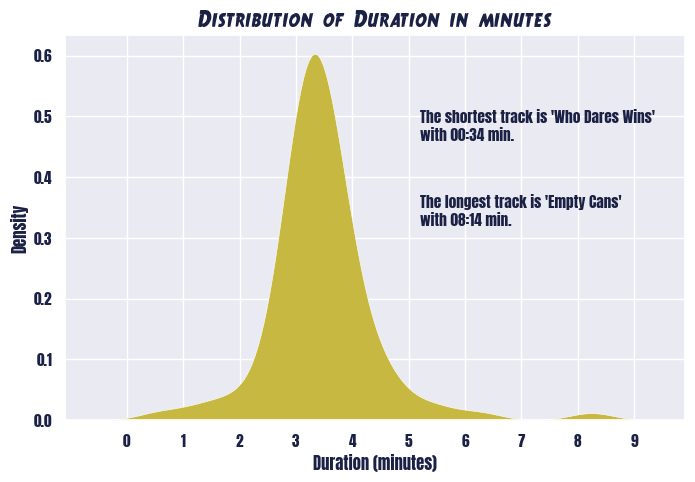

In [15]:
def convert_to_mmss(duration_minutes):
    minutes = int(duration_minutes)
    seconds = int((duration_minutes - minutes) * 60)
    return f"{minutes:02d}:{seconds:02d}"

ts['duration_minutes'] = ts['duration_ms'] / (1000 * 60)
plt.figure(figsize=(8,5))
sns.kdeplot(data=ts['duration_minutes'], fill=True, color= '#C6B841', alpha=1,edgecolor='#FFFFFF', linewidth=0.4)
plt.xlabel('Duration (minutes)', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.ylabel('Density', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.title('Distribution of Duration in minutes', fontproperties=prop, fontsize=17, color='#1B2145')
plt.yticks(fontproperties=prop2, fontsize=11, color='#1B2145')
plt.text(5.2, 0.46,f"The shortest track is '{ts.loc[ts['duration_ms'].idxmin(), 'name']}' \nwith {convert_to_mmss(ts['duration_minutes'].min())} min.", fontsize=11, fontproperties=prop2, color='#1B2145')
plt.text(5.2, 0.32,f"The longest track is '{ts.loc[ts['duration_ms'].idxmax(), 'name']}' \nwith {convert_to_mmss(ts['duration_minutes'].max())} min.", fontsize=11, fontproperties=prop2, color='#1B2145')
plt.xticks(np.arange(0,10,1),fontproperties=prop2, fontsize=11, color='#1B2145')
plt.show();

Most tracks are between 3 and 4 minutes.

### Popularity

Lets have a look at the popularity again. (The popularity of a track is a value between 0 and 100, with 100 being the most popular.)

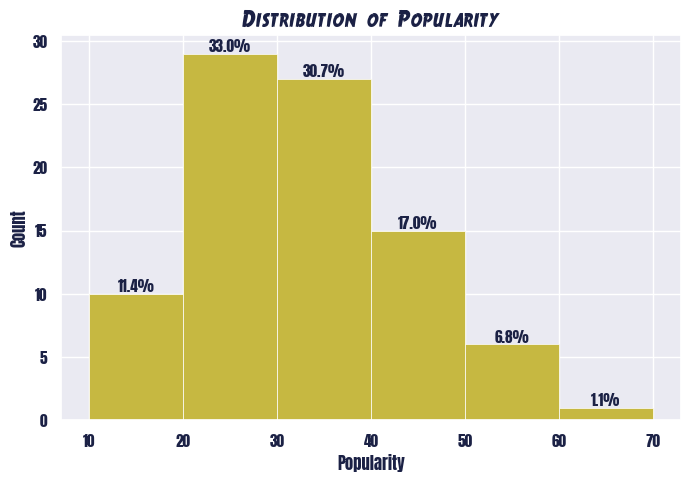

In [16]:
bin_boundaries = np.arange(10,80,10)
plt.figure(figsize=(8,5))
sns.histplot(ts['popularity'], color='#C6B841', edgecolor='#FFFFFF', alpha=1,linewidth=0.5, bins=bin_boundaries, stat='count')
plt.xlabel('Popularity', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.ylabel('Count', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.title('Distribution of Popularity', fontproperties=prop, fontsize=17, color='#1B2145')
plt.xticks(np.arange(10, 80, 10),fontproperties=prop2, fontsize=11, color='#1B2145')
plt.yticks(np.arange(0,35,5), fontproperties=prop2, fontsize=11, color='#1B2145')
counts, _ = np.histogram(ts['popularity'], bins=bin_boundaries)
total_count = len(ts['popularity'])
percentages = [(count / total_count) * 100 for count in counts]

for i, count in enumerate(counts):
    plt.text(bin_boundaries[i] + (bin_boundaries[i + 1] - bin_boundaries[i]) / 2, count, f'{percentages[i]:.1f}%', ha='center', va='bottom', color='#1B2145', fontsize=11,fontproperties=prop2)

plt.show();

### Danceability

How suitable are the tracks for dancing? A value of 0.0 is least danceable and 1.0 is most danceable.

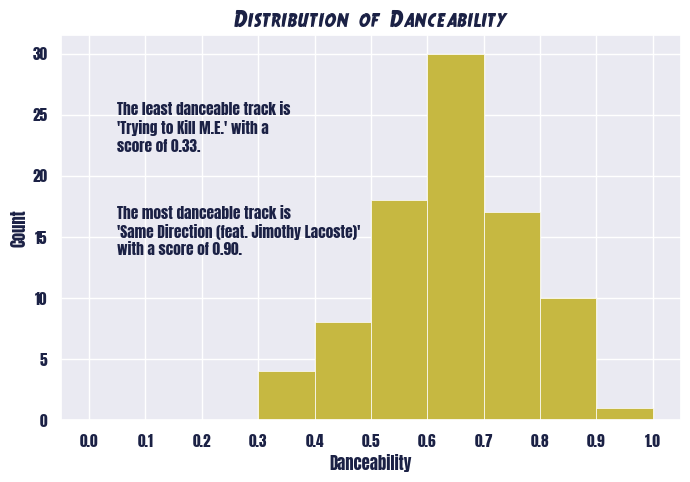

In [17]:
bin_boundaries = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(8,5))
sns.histplot(ts['danceability'], color='#C6B841', alpha=1, edgecolor='#FFFFFF', linewidth=0.5, bins=bin_boundaries, stat='count')
plt.xlabel('Danceability', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.ylabel('Count', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.title('Distribution of Danceability', fontproperties=prop, fontsize=17, color='#1B2145')
plt.yticks(np.arange(0, 35, 5), fontproperties=prop2, fontsize=11, color='#1B2145') 
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1), fontproperties=prop2, fontsize=11, color='#1B2145')
plt.text(0.05, 22,f"The least danceable track is \n'{ts.loc[ts['danceability'].idxmin(), 'name']}' with a \nscore of {ts['danceability'].min():.2f}.",fontproperties=prop2, fontsize=11, color='#1B2145')
plt.text(0.05, 13.5,f"The most danceable track is \n'{ts.loc[ts['danceability'].idxmax(), 'name']}' \nwith a score of {ts['danceability'].max():.2f}.", fontproperties=prop2, fontsize=11, color='#1B2145')
plt.show();

The majority of songs is rather danceable.

Let's have a look at

### Energy

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

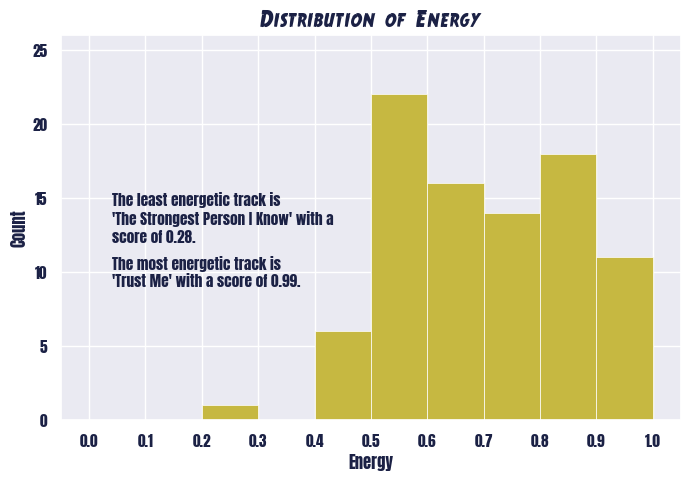

In [18]:
bin_boundaries = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(8,5))
sns.histplot(ts['energy'],  color='#C6B841', edgecolor='#FFFFFF', alpha=1, linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('Distribution of Energy', fontproperties=prop, fontsize=17, color='#1B2145')
plt.xlabel('Energy', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.ylabel('Count', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.yticks(np.arange(0, 30, 5), fontproperties=prop2, fontsize=11, color='#1B2145') 
plt.ylim(0,26)
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1),fontproperties=prop2, fontsize=11, color='#1B2145')
plt.text(0.04, 12,f"The least energetic track is \n'{ts.loc[ts['energy'].idxmin(), 'name']}' with a \nscore of {ts['energy'].min():.2f}.", fontproperties=prop2, fontsize=11, color='#1B2145')
plt.text(0.04, 9,f"The most energetic track is \n'{ts.loc[ts['energy'].idxmax(), 'name']}' with a score of {ts['energy'].max():.2f}.", fontproperties=prop2, fontsize=11, color='#1B2145')
plt.show();

Most tracks are quite energetic. That corresponds to my perception. I agree that "The Strongest Person I Know" isn't and "Trust Me" is an energetic song. However, a score of 0.99 is very high suggesting there could hardly be any more energetic songs. 

### Loudness

This variable describes the overall loudness of a track in decibels (dB)

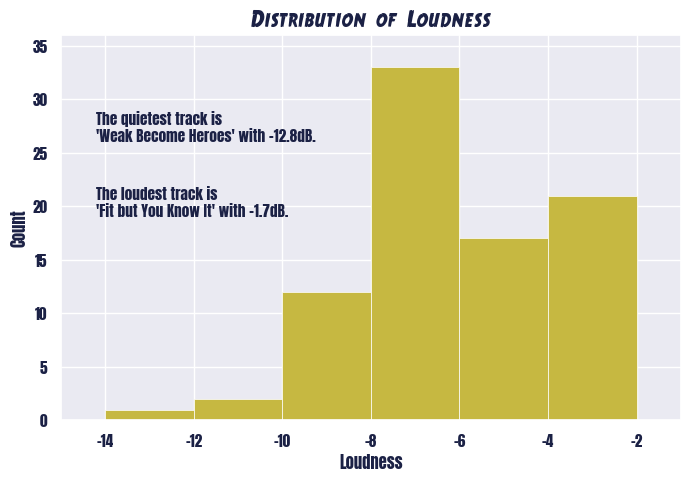

In [19]:
bin_boundaries = np.arange(-22, 0, 2)
plt.figure(figsize=(8,5))
sns.histplot(ts['loudness'], color='#C6B841', edgecolor='#FFFFFF', alpha=1, linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('Distribution of Loudness', fontproperties=prop, fontsize=17, color='#1B2145')
plt.xlabel('Loudness', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.ylabel('Count', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.yticks(np.arange(0,40,5), fontproperties=prop2, fontsize=11, color='#1B2145') 
plt.ylim(0,36)
plt.grid(True)
plt.xlim(-15,-1)
plt.xticks(np.arange(-14, -1, 2),fontproperties=prop2, fontsize=11, color='#1B2145')
plt.text(-14.2, 26,f"The quietest track is \n'{ts.loc[ts['loudness'].idxmin(), 'name']}' with {ts['loudness'].min():.1f}dB.", fontproperties=prop2, fontsize=11, color='#1B2145')
plt.text(-14.2, 19,f"The loudest track is \n'{ts.loc[ts['loudness'].idxmax(), 'name']}' with {ts['loudness'].max():.1f}dB.", fontproperties=prop2, fontsize=11, color='#1B2145')
plt.show();

Most songs are rather loud. I agree that "Weak Become Heroes" isn't and "Fit but You Know It" is a loud track.

### Speechiness

Speechiness detects the presence of spoken words in a track. The documentation gives a rough orientation:
- values > 0.66: track probably made entirely of spoken words
- 0.33 > values < 0.66: track may contain both music and speech
- values < 0.33: music and other non-speech-like track

Since all tracks contain spoken words (rap), usually combined with sung vocals, the scores should be quite high.

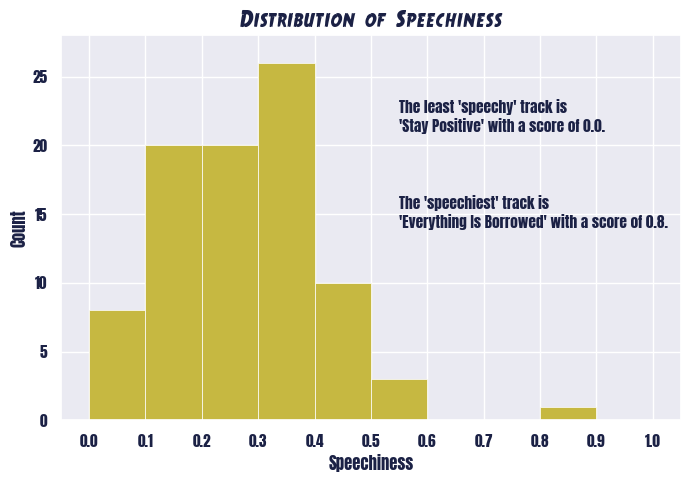

In [20]:
bin_boundaries = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(8,5))
sns.histplot(ts['speechiness'], color='#C6B841', edgecolor='#FFFFFF', alpha=1, linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('Distribution of Speechiness', fontproperties=prop, fontsize=17, color='#1B2145')
plt.xlabel('Speechiness', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.ylabel('Count', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.yticks(np.arange(0, 35, 5), fontproperties=prop2, fontsize=11, color='#1B2145')
plt.ylim(0,28)
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1), fontproperties=prop2, fontsize=11, color='#1B2145')
plt.text(0.55, 21,f"The least 'speechy' track is \n'{ts.loc[ts['speechiness'].idxmin(), 'name']}' with a score of {ts['speechiness'].min():.1f}.", fontproperties=prop2, fontsize=11, color='#1B2145')
plt.text(0.55, 14,f"The 'speechiest' track is \n'{ts.loc[ts['speechiness'].idxmax(), 'name']}' with a score of {ts['speechiness'].max():.1f}.", fontproperties=prop2, fontsize=11, color='#1B2145')
plt.show();

Ok, true: There are a couple of tracks in which the rap part can be interpreted as sung vocals, too. "Stay Positive" is indeed one of them. 

I don't understand why "Everything Is Borrowed" has such an exceptionally high speechiness score since it isn't a pure rap song but also contains a lot of singing. 

### Acousticness

Since The Streets experiment a lot overall, there are a lot of electronically accompanied tracks as well as some tracks that are accompanied by piano, for example.

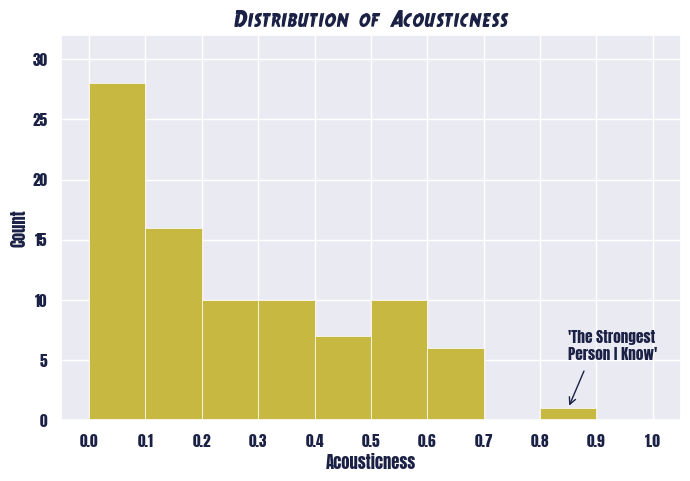

In [21]:
bin_boundaries = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(8,5))
sns.histplot(ts['acousticness'], color='#C6B841', edgecolor='#FFFFFF', alpha=1, linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('Distribution of Acousticness', fontproperties=prop, fontsize=17, color='#1B2145')
plt.xlabel('Acousticness', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.ylabel('Count', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.yticks(np.arange(0, 40, 5), fontproperties=prop2, fontsize=11, color='#1B2145') 
plt.grid(True)
plt.ylim(0,32)
plt.xticks(np.arange(0, 1.1, 0.1),fontproperties=prop2, fontsize=11, color='#1B2145')
plt.text(0.85, 5,f"'The Strongest \nPerson I Know'", fontproperties=prop2, fontsize=11, color='#1B2145')
plt.annotate('', xy=(0.88, 4.3), xytext=(0.85, 1),
             arrowprops=dict(color='#1B2145', arrowstyle='<-'))
plt.show();

Indeed, "The Strongest Person I Know" seems to be fully acoustic. The other songs in that list contain more or less electronical elements.

What about

### Instrumentalness

I can't think of any purely instrumental song of 

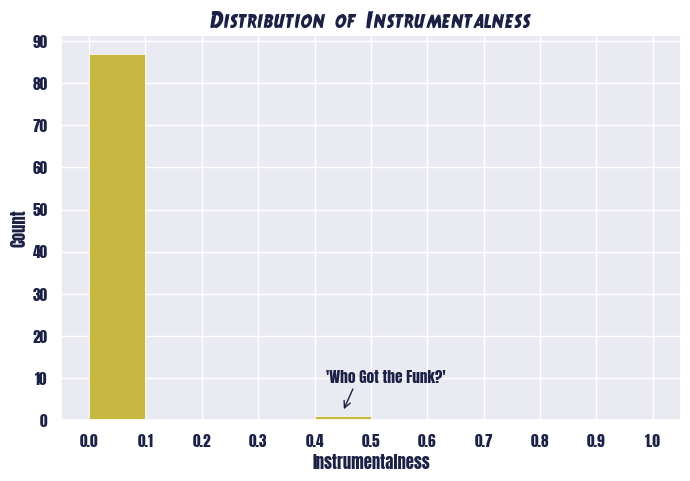

In [22]:
bin_boundaries = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(8,5))
sns.histplot(ts['instrumentalness'], color='#C6B841', edgecolor='#FFFFFF', alpha=1 ,linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('Distribution of Instrumentalness', fontproperties=prop, fontsize=17, color='#1B2145')
plt.xlabel('Instrumentalness', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.ylabel('Count', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.yticks(np.arange(0, 95, 10), fontproperties=prop2, fontsize=11, color='#1B2145') 
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1),fontproperties=prop2, fontsize=11, color='#1B2145')
plt.text(0.42, 9,f"'{ts.loc[ts['instrumentalness'].idxmax(), 'name']}'", fontproperties=prop2, fontsize=11, color='#1B2145')
plt.annotate('', xy=(0.47, 8), xytext=(0.45, 2),
             arrowprops=dict(color='#1B2145', arrowstyle='<-'))
plt.show();

Well, "Who Got the Funk" is *not* an instrumental.

Let's check

### Liveness

The scores should be low as I have removed all live albums from this analysis.

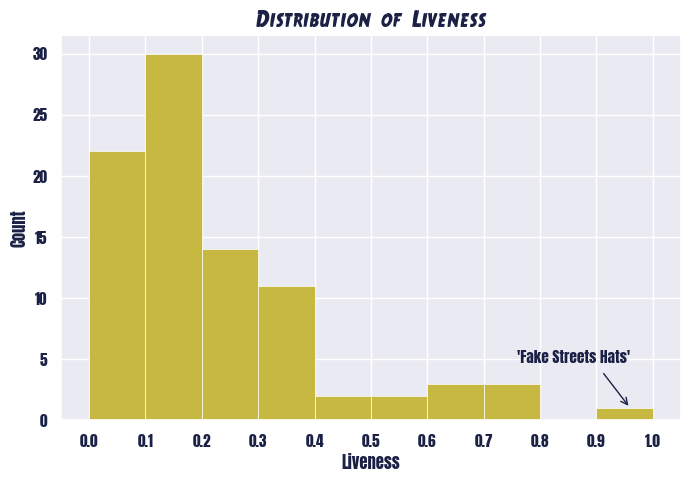

In [23]:
bin_boundaries = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(8,5))
sns.histplot(ts['liveness'], color='#C6B841', edgecolor='#FFFFFF', alpha=1, linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('Distribution of Liveness', fontproperties=prop, fontsize=17, color='#1B2145')
plt.xlabel('Liveness', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.ylabel('Count', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.yticks(np.arange(0, 33, 5), fontproperties=prop2, fontsize=11, color='#1B2145') 
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1),fontproperties=prop2, fontsize=11, color='#1B2145')
plt.text(0.76, 4.7,f"'{ts.loc[ts['liveness'].idxmax(), 'name']}'", fontproperties=prop2, fontsize=11, color='#1B2145')
plt.annotate('', xy=(0.91, 4), xytext=(0.96, 1),
             arrowprops=dict(color='#1B2145', arrowstyle='<-'))
plt.show();

One of the desired effects in the song "Fake Street Hats" is that it sounds like a live recording, which it is not. But the high score is fine.

Let's have a look at the 

### Valence

I'm interested in the valence value. Remember: It's a value between 0 and 1 while 0 means negative (sad, depressed, angry, etc.) and 1 means positive (happy, cheerful, euphoric, etc.). I assume there'll be a high range for this band.

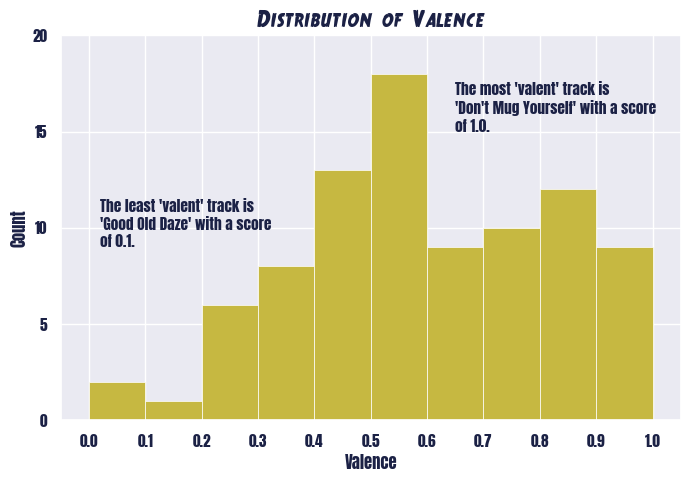

In [24]:
bin_boundaries = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(8,5))
sns.histplot(ts['valence'], color='#C6B841', edgecolor='#FFFFFF', alpha=1, linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('Distribution of Valence', fontproperties=prop, fontsize=17, color='#1B2145')
plt.xlabel('Valence', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.ylabel('Count', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.yticks(np.arange(0, 21, 5), fontproperties=prop2, fontsize=11, color='#1B2145') 
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1), fontproperties=prop2, fontsize=11, color='#1B2145')
plt.text(0.02, 9,f"The least 'valent' track is \n'{ts.loc[ts['valence'].idxmin(), 'name']}' with a score \nof {ts['valence'].min():.1f}.", fontproperties=prop2, fontsize=11, color='#1B2145')
plt.text(0.65, 15,f"The most 'valent' track is \n'{ts.loc[ts['valence'].idxmax(), 'name']}' with a score \nof {ts['valence'].max():.1f}.", fontproperties=prop2, fontsize=11, color='#1B2145')
plt.show();

Indeed, a high range. That "Good Old Daze" has a low and "Don't Mug Yourself" seems reasonable to me.

### Tempo

This is the speed of a song, in beats per minute (BPM)

In [25]:
ts.loc[ts['tempo'].idxmin(), 'name']

'Phone Is Always In My Hand (feat. Dapz on the Map)'

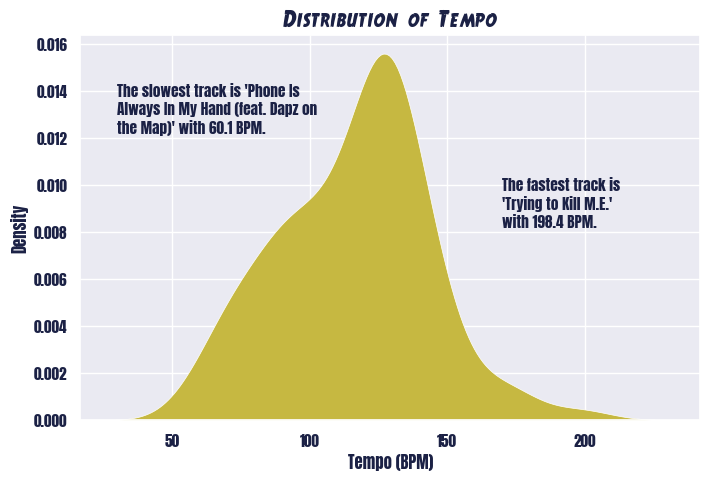

In [26]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=ts['tempo'], fill=True, color= '#C6B841', alpha=1,edgecolor='#FFFFFF', linewidth=0.5)
plt.xlabel('Tempo (BPM)', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.ylabel('Density', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.title('Distribution of Tempo', fontproperties=prop, fontsize=17, color='#1B2145')
plt.yticks(fontproperties=prop2, fontsize=11, color='#1B2145')
plt.xticks(fontproperties=prop2, fontsize=11, color='#1B2145')
plt.text(30, 0.0122, f"The slowest track is 'Phone Is \nAlways In My Hand (feat. Dapz on \nthe Map)' with {ts['tempo'].min():.1f} BPM.", fontproperties=prop2, fontsize=11, color='#1B2145')
plt.text(170, 0.0082,f"The fastest track is \n'{ts.loc[ts['tempo'].idxmax(), 'name']}' \nwith {ts['tempo'].max():.1f} BPM.", fontproperties=prop2, fontsize=11, color='#1B2145')
plt.show();

We see that most of the songs are around 125 BPM. 
I don't perceive "The Phone Is Always In My Hand" particularly slow, nor do I find "Trying to Kill M.E." particularly fast

Let's now have a look at

### Time Signature

The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

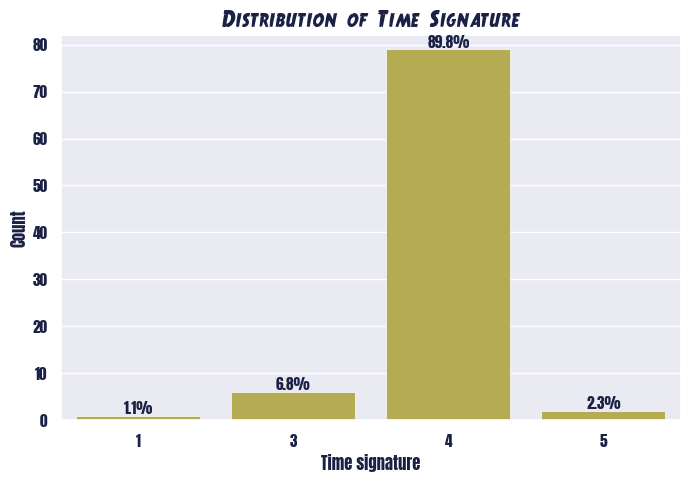

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x='time_signature', data=ts, color='#C6B841', edgecolor='#FFFFFF', alpha=1, linewidth=0.5)
plt.title('Distribution of Time Signature', fontproperties=prop, fontsize=17, color='#1B2145')
plt.xlabel('Time signature', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.ylabel('Count', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.yticks(np.arange(0, 100, 10), fontproperties=prop2, fontsize=11, color='#1B2145') 
plt.xticks(fontproperties=prop2, fontsize=11, color='#1B2145') 
plt.ylim(0,82)
plt.grid(True, axis='y') 
total = float(len(ts))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontproperties=prop2, fontsize=11, color='#1B2145')
plt.show();

Ok, by far most tracks are in 4/4.

Remember what the documentation said: *The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4"*. (This assumes, that all songs are in a x/4 meter, which is not true in the real world.) 
And I'm not sure why there's a 1 here, if the range is supposed to be from 3 to 7.

Let's have a look at the 

### Mode

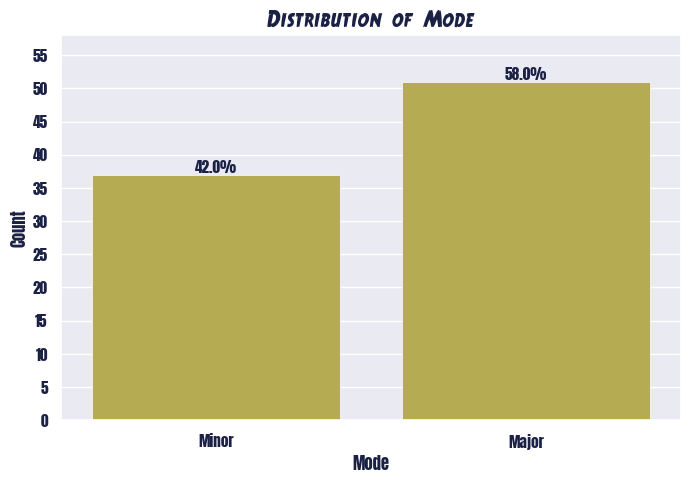

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(x='mode', data=ts, color='#C6B841', edgecolor='#FFFFFF', alpha=1,linewidth=0.5)
plt.title('Distribution of Mode', fontproperties=prop, fontsize=17, color='#1B2145')
plt.xlabel('Mode', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.ylabel('Count', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.yticks(np.arange(0, 60, 5), fontproperties=prop2, fontsize=11, color='#1B2145') 
plt.ylim(0,58)
plt.xticks([0, 1], ['Minor', 'Major'], fontproperties=prop2, fontsize=11, color='#1B2145')
total = float(len(ts))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontproperties=prop2, fontsize=11, color='#1B2145')
plt.grid(True, axis='y') 
plt.show();

Most songs are in Major.

What about the

### Key

The key the track is in. [Pitchclass notation](https://en.wikipedia.org/wiki/Pitch_class) is being used here. For the plot I'll convert the numbers from 0-11 to their tonal counterparts.

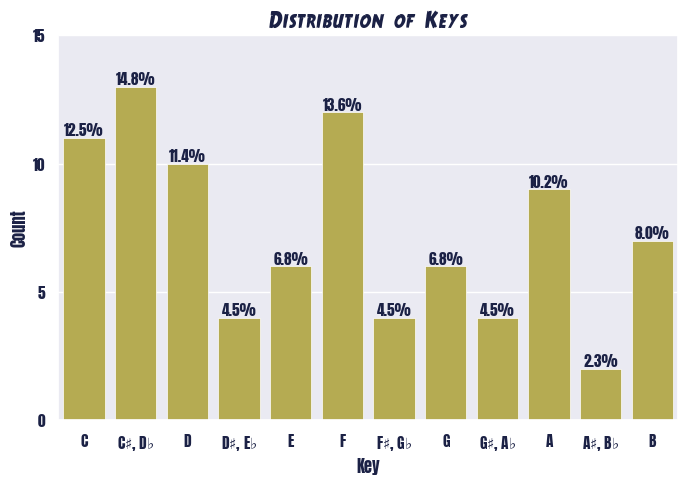

In [29]:
occurrences = ts['key'].value_counts().reindex(range(12), fill_value=0)

order = range(12)
labels = ['C', r'C$\sharp$, D$\flat$', 'D', r'D$\sharp$, E$\flat$', 'E', 'F', r'F$\sharp$, G$\flat$', 'G', r'G$\sharp$, A$\flat$', 'A', r'A$\sharp$, B$\flat$','B']
plt.figure(figsize=(8, 5))
sns.countplot(x='key', data=ts, order=order, color='#C6B841', edgecolor='#FFFFFF', alpha=1,linewidth=0.5)
plt.title('Distribution of Keys', fontproperties=prop, fontsize=17, color='#1B2145')
plt.xlabel('Key', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.ylabel('Count', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.xticks(order, labels, fontproperties=prop2, fontsize=11, color='#1B2145')
plt.yticks(np.arange(0, 20, 5), fontproperties=prop2, fontsize=11, color='#1B2145') 
total = float(len(ts))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontproperties=prop2, fontsize=11, color='#1B2145')
plt.show()

All musical possibilities are used ;)

Last variable I want to look at is separately whether or not The Streets tracks have explicit lyrics. (I know that some do.)

### Explicitness

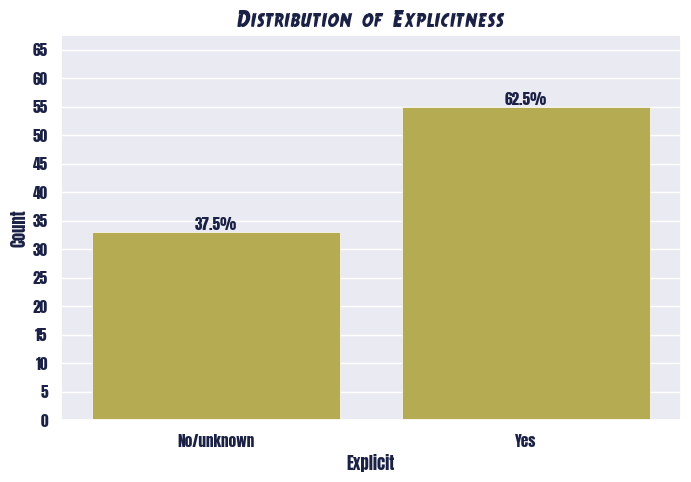

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(x='explicit', data=ts, color='#C6B841', edgecolor='#FFFFFF', alpha=1,linewidth=0.5)
plt.title('Distribution of Explicitness', fontproperties=prop, fontsize=17, color='#1B2145')
plt.xlabel('Explicit', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.ylabel('Count', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.yticks(np.arange(0, 70, 5), fontproperties=prop2, fontsize=11, color='#1B2145') 
plt.ylim(0,67.5)
plt.xticks(ticks=[0, 1], labels=['No/unknown', 'Yes'],fontproperties=prop2, fontsize=11, color='#1B2145')
total = float(len(ts))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontproperties=prop2, fontsize=11, color='#1B2145')
plt.grid(True, axis='y') 
plt.show();

Uh, most lyrics are explicit!

### Word Cloud

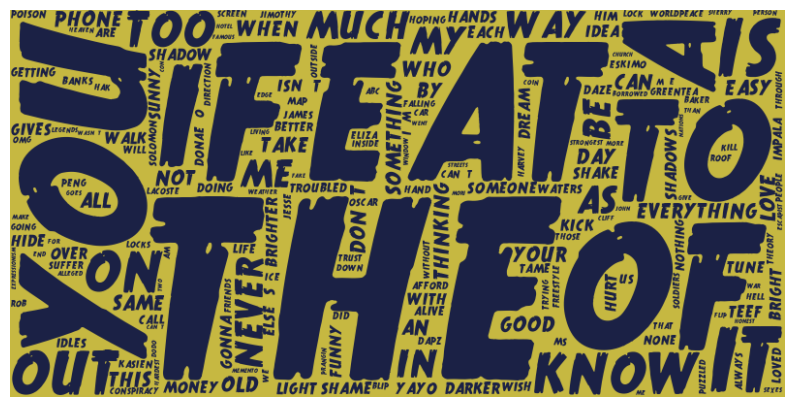

In [31]:
list_of_strings = ts['name'].tolist()

word_counts = {}
for name in list_of_strings:
    for word in name.split():
        word = word.lower()
        word_counts[word] = word_counts.get(word, 0) + 1

wordcloud = WordCloud(width=800, height=400, background_color='#C6B841', random_state=5, font_path='/Users/johannakruger/Library/Fonts/crimes.ttf', color_func=lambda *args, **kwargs: "#1B2145")

wordcloud.generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('')
plt.show()

## Relationships

A correlation heatmap is always a good start when diving into relationships.

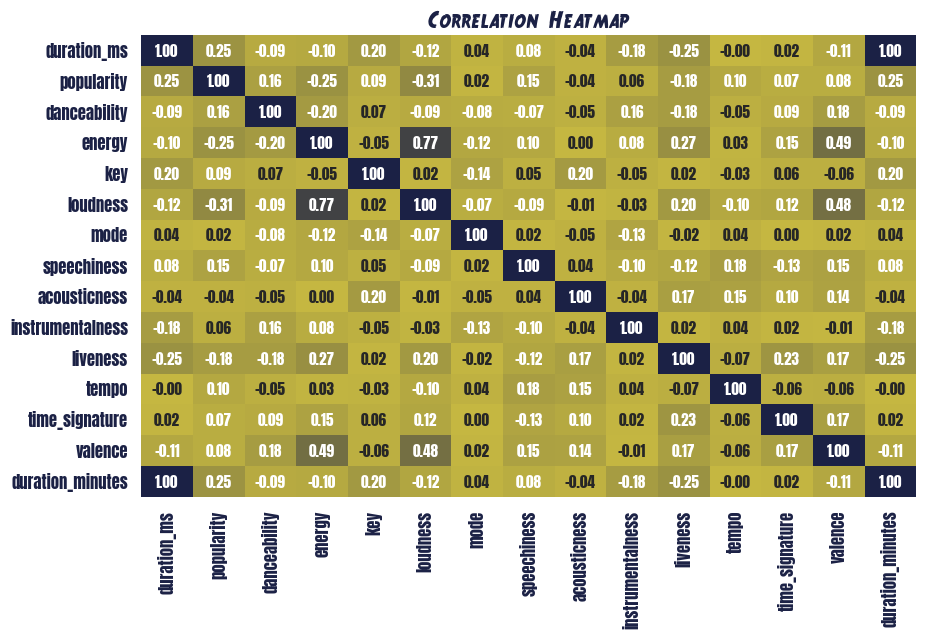

In [32]:
from matplotlib.colors import LinearSegmentedColormap

numerical_columns = ts.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_columns.corr()

colors = [(0, '#1B2145'), (0.5, '#C6B841'), (1, '#1B2145')]
cmap = LinearSegmentedColormap.from_list('custom', colors)

plt.figure(figsize=(10,6))
plt.title('Correlation Heatmap', fontproperties=prop, fontsize=17, color='#1B2145')
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0, fmt=".2f", vmin=-1, cbar=False,vmax=1, annot_kws={"fontproperties": prop2, "fontsize": 11})
plt.xticks(fontproperties=prop2, fontsize=12, color='#1B2145')
plt.yticks(fontproperties=prop2, fontsize=12, color='#1B2145')
plt.grid(False) 
plt.show()

How can these numbers be interpreted?


    
| Size of Correlation| Interpretation|
|---|---|
|0.90 to 1.00 (−0.90 to −1.00) |Very high positive (negative) correlation |
|0.70 to 0.90 (−0.70 to −0.90) |High positive (negative) correlation      |
|0.50 to 0.70 (−0.50 to −0.70) |Moderate positive (negative) correlation  |
|0.30 to 0.50 (−0.30 to −0.50) |Low positive (negative) correlation       |
|0.00 to 0.30 (0.00 to −0.30)  |Negligible correlation                    |

Let's have a look at only those correlations that are below -0.3 and above 0.3 and exclude the perfect correlations that each variable has with itself.

In [33]:
# create a dataset with combinations of variables that have a higher correlation coefficent than |0.3| and sort by absolute correlation coefficient
filtered_correlations = correlation_matrix[((correlation_matrix >= 0.3) & (correlation_matrix < 1 - 1e-10)) | ((correlation_matrix <= -0.3) & (correlation_matrix > -1 + 1e-10))]
filtered_correlations_df = filtered_correlations.unstack().reset_index()
filtered_correlations_df.columns = ['Variable 1', 'Variable 2', 'Correlation']
filtered_correlations_df = filtered_correlations_df.dropna()
filtered_correlations_df = filtered_correlations_df.drop_duplicates(subset=['Correlation'])
filtered_correlations_df['Variables'] = filtered_correlations_df['Variable 1'] + ' - ' + filtered_correlations_df['Variable 2']
filtered_correlations_df = filtered_correlations_df.drop(columns=['Variable 1', 'Variable 2'])
filtered_correlations_df = filtered_correlations_df[['Variables', 'Correlation']]
filtered_correlations_df['Absolute Correlation'] = abs(filtered_correlations_df['Correlation'])
filtered_correlations_df = filtered_correlations_df.sort_values(by='Absolute Correlation', ascending=True)
filtered_correlations_df = filtered_correlations_df.drop(columns='Absolute Correlation')
filtered_correlations_df.set_index('Variables', inplace=True)

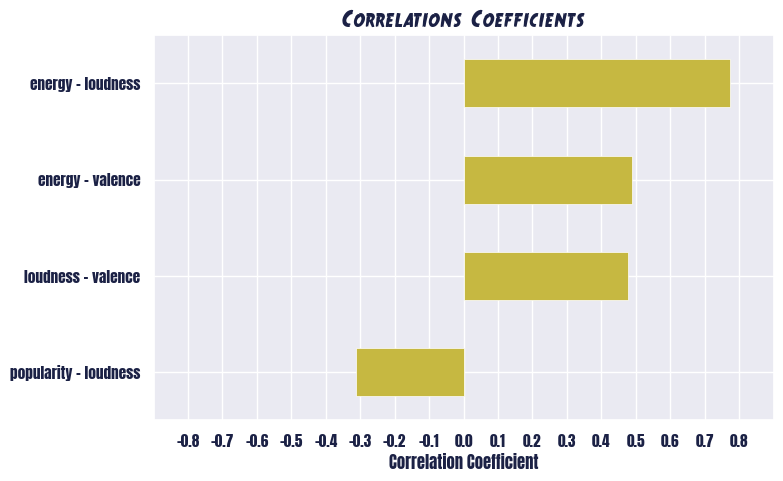

In [34]:
# plot this
ax = filtered_correlations_df.plot(kind='barh', color='#C6B841', alpha=1, edgecolor='#FFFFFF', linewidth=.5, legend=False, figsize=(8, 5))
plt.xlabel('Correlation Coefficient', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.ylabel('', fontproperties=prop2, fontsize=12, color='#1B2145')
plt.title('Correlations Coefficients', fontproperties=prop, fontsize=17, color='#1B2145')
plt.xlim(-0.9,0.9)
plt.xticks(np.arange(-0.8, 0.9, 0.1), fontproperties=prop2, fontsize=11, color='#1B2145')
plt.yticks(fontproperties=prop2, fontsize=11, color='#1B2145')
thresholds = [-0.7, -0.5, -0.3, 0.3, 0.5, 0.7]
plt.show();

We do see:
- in general very few significant correlations
- a high positive correlation between energy and loudness (the more energetic the louder, or the other way around, correlation doesn't describe causality)
- a low positive correlation between energy and valence (the more energetic the smaller the valence score, or the other way around)
- a low positive correlation between loudness and valence (the louder the smaller the valence score, or the other way around)
- a low negative correlation between popularity and loudness (the more popular the quieter)

Remember, this plot does not include all these very low correlations (between -0.3 and 0.3) that we saw in the heatmap.

The relationships between energy, loudness and valence are reasonable.

I hadn't expected that quieter songs tend to be more popular.

### Energy vs Valence
We learned there is only one pair of variables which show a high correlation. Let's plot these first.

Please note:
**Github cannot display interactive elements. Please use [nbviewer](https://nbviewer.org/github/scheinmensch/Spotify/blob/main/TheStreets.ipynb?flush_cache=False) to view the following plots.**

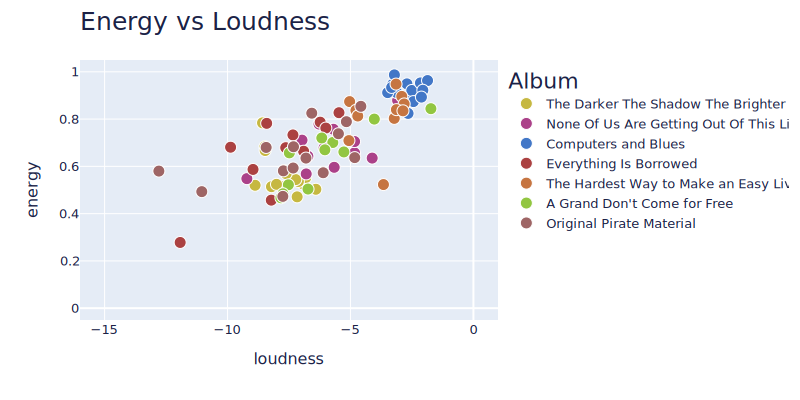

In [35]:
fig = px.scatter(ts, x='loudness', y='energy', color='album_name', custom_data=['name'], color_discrete_map=cpal_px, opacity=1)

fig.update_traces(marker=dict(size=12,
                              line=dict(width=1,
                                        color='white')),
                  selector=dict(mode='markers'))
fig.update_traces(hovertemplate='%{customdata[0]}')
fig.update_layout(
    title="Energy vs Loudness",
    legend_title="Album",
    title_x=0.1, 
    width=800,
    height=400,
    font_family="Anton-Regular",
    font_color="#1B2145",
    font_size=13,
    title_font_family="True Crimes",
    title_font_size=25,
    legend_title_font_family="True Crimes",
    legend_title_font_size=22)
fig.update_yaxes(range=[-0.05, 1.05])
fig.update_xaxes(range=[-16, 1])
fig.show()

In this plot we can see the relationship between loudness and energy quite well. The energy score increases as the loudness increases.

### Radar chart

I want to create a radar chart to show the mean values of all of those variables which are between 0 and 1. I use plotly for this. 

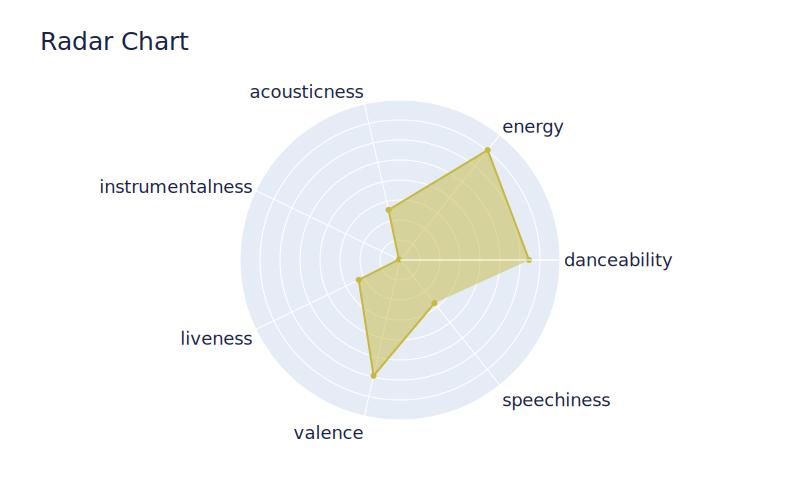

In [36]:
mean_scores = ts[['danceability', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'speechiness']].mean()
mean_df = pd.DataFrame(mean_scores).reset_index()
mean_df.columns = ['score', 'median']

fig = go.Figure(data=go.Scatterpolar(
    r=mean_df['median'],
    theta=mean_df['score'],
    fill='toself',
    hovertemplate='%{theta}<br>mean: %{r:.2f}'))

fig.update_layout(
    title="Radar Chart",
    width=800,
    height=500,
    font_family="Anton-Regular",
    font_color="#1B2145",
    font_size=18,
    title_font_family="True Crimes",
    title_font_size=25,
    legend_title_font_family="True Crimes",
    legend_title_font_size=22,
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 0.8],
            tickvals=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
            showticklabels=False)))

fig.update_traces(line=dict(color='#C6B841'), hoverlabel=dict(namelength=0))

fig.show()